In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from init_utils import *
%matplotlib inline
plt.rcParams['figure.figsize'] = (7.0,4.0)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'


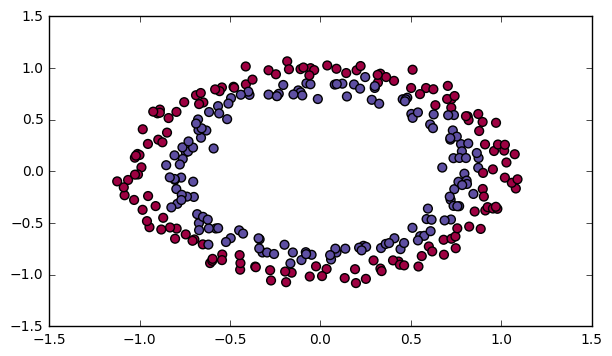

In [2]:
train_X , train_Y , test_X , test_Y = load_dataset()

In [3]:
#creating model to test our initialization in future

def model(X,Y,learning_rate=0.01,num_iter=15000,print_cost=True , initialization="he"):
    grads = {}
    costs =[]
    
    m = X.shape[1]
    layers_dims = [X.shape[0] , 10 , 5 ,1 ]
    if initialization == "zeros":
        parameters = initialize_parameters_zeros(layers_dims)
    elif initialization == "random":
        parameters = initialize_parameters_random(layers_dims)
    elif initialization == "he":
        parameters = initialize_parameters_he(layers_dims)
    
    for i in range(num_iter):
        
        a3 , cache = forward_propagation(X,parameters)
        
        cost = compute_loss(a3,Y)
        
        grads = backward_propagation(X,Y,cache)
        
        parameters = update_parameters(parameters , grads , learning_rate)
        
        if print_cost and i%1000 ==0:
            print("Cost after iteration {}:{}".format(i,cost))
            costs.append(cost)
        
    plt.plot(costs)
    plt.ylabel('cost')
    plt.xlabel('iterations (per hundread)')
    plt.title("Learning rate = " + str(learning_rate))
    plt.show()
    
    return parameters

In [4]:
def initialize_parameters_zeros(layers_dims):
    parameters={}
    L = len(layers_dims)
    
    for i in range(1,L):
        parameters['W'+str(i)] = np.zeros((layers_dims[i],layers_dims[i-1]))
        parameters['b'+str(i)] = np.zeros((layers_dims[i],1))
    
    return parameters

In [5]:
parameters = initialize_parameters_zeros([3,2,1])
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[ 0.  0.  0.]
 [ 0.  0.  0.]]
b1 = [[ 0.]
 [ 0.]]
W2 = [[ 0.  0.]]
b2 = [[ 0.]]


Cost after iteration 0:0.6931471805599453
Cost after iteration 1000:0.6931471805599453
Cost after iteration 2000:0.6931471805599453
Cost after iteration 3000:0.6931471805599453
Cost after iteration 4000:0.6931471805599453
Cost after iteration 5000:0.6931471805599453
Cost after iteration 6000:0.6931471805599453
Cost after iteration 7000:0.6931471805599453
Cost after iteration 8000:0.6931471805599453
Cost after iteration 9000:0.6931471805599453
Cost after iteration 10000:0.6931471805599455
Cost after iteration 11000:0.6931471805599453
Cost after iteration 12000:0.6931471805599453
Cost after iteration 13000:0.6931471805599453
Cost after iteration 14000:0.6931471805599453


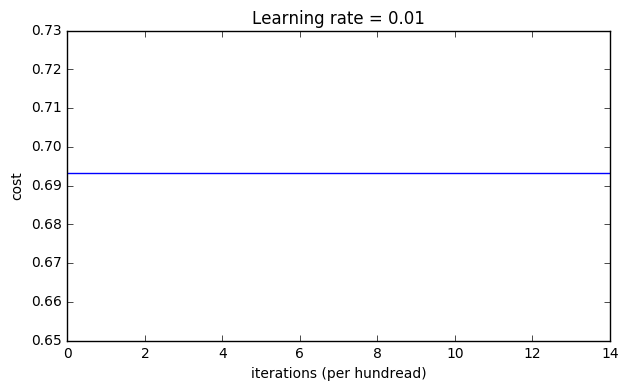

On train set:
Accuracy: 0.5
On test set:
Accuracy: 0.5


In [6]:
parameters = model(train_X , train_Y , initialization="zeros")
print("On train set:")
predictions_train = predict(train_X , train_Y , parameters)

print("On test set:")
predictions_test = predict(test_X , test_Y , parameters)


In [7]:
print("prediction train " + str(predictions_train))
print("prediction test " + str(predictions_test))

prediction train [[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0]]
prediction test [[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


/home/devendra/anaconda3/envs/dlnd-tf-lab/lib/python3.5/site-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
/home/devendra/anaconda3/envs/dlnd-tf-lab/lib/python3.5/site-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


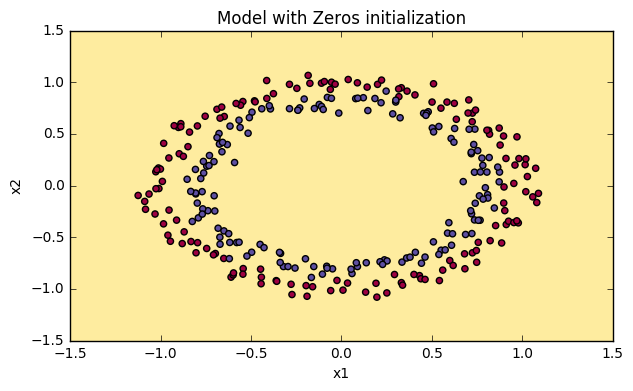

In [8]:
plt.title("Model with Zeros initialization")
axes = plt.gca()
axes.set_xlim([-1.5,1.5])
axes.set_ylim([-1.5,1.5])
plot_decision_boundary(lambda x: predict_dec(parameters,x.T) , train_X , train_Y)

In [17]:
def initialize_parameters_random(layers_dims):
    np.random.seed(3)
    parameters = {}
    L = len(layers_dims)
    
    for i in range(1,L):
        parameters['W'+str(i)] = np.random.randn(layers_dims[i],layers_dims[i-1])*10
        parameters['b'+str(i)] = np.zeros((layers_dims[i],1))
    return parameters

In [18]:
parameters = initialize_parameters_random([3,2,1])
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[ 17.88628473   4.36509851   0.96497468]
 [-18.63492703  -2.77388203  -3.54758979]]
b1 = [[ 0.]
 [ 0.]]
W2 = [[-0.82741481 -6.27000677]]
b2 = [[ 0.]]


/home/devendra/Devendra_study/deep_learning_coursera/course2/week1/Initialization/init_utils.py:145: RuntimeWarning: divide by zero encountered in log
  logprobs = np.multiply(-np.log(a3),Y) + np.multiply(-np.log(1 - a3), 1 - Y)
/home/devendra/Devendra_study/deep_learning_coursera/course2/week1/Initialization/init_utils.py:145: RuntimeWarning: invalid value encountered in multiply
  logprobs = np.multiply(-np.log(a3),Y) + np.multiply(-np.log(1 - a3), 1 - Y)


Cost after iteration 0:inf
Cost after iteration 1000:0.6242434241539614
Cost after iteration 2000:0.5978811277755388
Cost after iteration 3000:0.5636242569764779
Cost after iteration 4000:0.5500958254523324
Cost after iteration 5000:0.544339206192789
Cost after iteration 6000:0.5373584514307651
Cost after iteration 7000:0.469574666760224
Cost after iteration 8000:0.39766324943219844
Cost after iteration 9000:0.3934423376823982
Cost after iteration 10000:0.3920158992175907
Cost after iteration 11000:0.38913979237487845
Cost after iteration 12000:0.3861261344766218
Cost after iteration 13000:0.3849694511273874
Cost after iteration 14000:0.3827489017191917


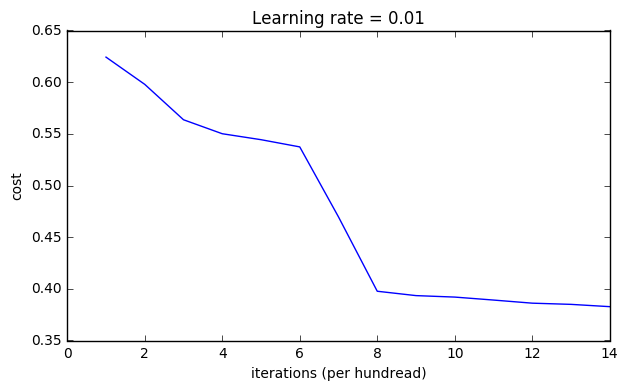

On the train set:
Accuracy: 0.83
On the test set:
Accuracy: 0.86


In [19]:
parameters = model(train_X , train_Y , initialization="random")
print("On the train set:")
predictions_train = predict(train_X , train_Y , parameters)

print("On the test set:")
predictions_test = predict(test_X , test_Y , parameters)

/home/devendra/anaconda3/envs/dlnd-tf-lab/lib/python3.5/site-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
/home/devendra/anaconda3/envs/dlnd-tf-lab/lib/python3.5/site-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


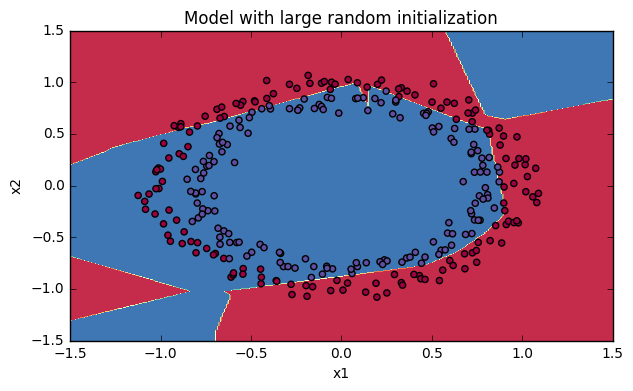

In [22]:
plt.title("Model with large random initialization")
axes = plt.gca()
axes.set_xlim([-1.5,1.5])
axes.set_ylim([-1.5,1.5])
plot_decision_boundary(lambda x: predict_dec(parameters , x.T) , train_X , train_Y)

In [23]:
#'HE' initialization recommended for relu activation

def initialize_parameters_he(layers_dims):
    np.random.seed(3)
    parameters= {}
    L = len(layers_dims)
    
    for i in range(1,L):
        parameters["W"+str(i)] = np.random.randn(layers_dims[i],layers_dims[i-1])*np.sqrt(2.0/layers_dims[i-1])
        parameters["b"+str(i)] = np.zeros((layers_dims[i],1))
    
    return parameters

In [24]:
parameters = initialize_parameters_he([2,4,1])
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[ 1.78862847  0.43650985]
 [ 0.09649747 -1.8634927 ]
 [-0.2773882  -0.35475898]
 [-0.08274148 -0.62700068]]
b1 = [[ 0.]
 [ 0.]
 [ 0.]
 [ 0.]]
W2 = [[-0.03098412 -0.33744411 -0.92904268  0.62552248]]
b2 = [[ 0.]]


Cost after iteration 0:0.8830537463419761
Cost after iteration 1000:0.6879825919728063
Cost after iteration 2000:0.6751286264523371
Cost after iteration 3000:0.6526117768893807
Cost after iteration 4000:0.6082958970572938
Cost after iteration 5000:0.5304944491717495
Cost after iteration 6000:0.4138645817071794
Cost after iteration 7000:0.3117803464844441
Cost after iteration 8000:0.23696215330322562
Cost after iteration 9000:0.18597287209206834
Cost after iteration 10000:0.15015556280371806
Cost after iteration 11000:0.12325079292273546
Cost after iteration 12000:0.09917746546525934
Cost after iteration 13000:0.08457055954024278
Cost after iteration 14000:0.07357895962677369


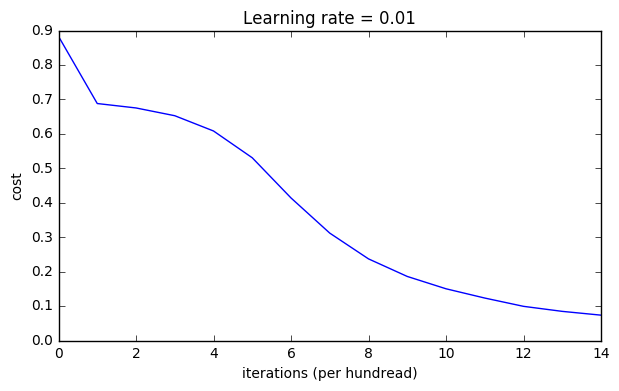

On train set: 
Accuracy: 0.993333333333
On test set: 
Accuracy: 0.96


In [25]:
parameters = model(train_X ,train_Y , initialization="he")
print("On train set: ")
predictions_train = predict(train_X , train_Y , parameters)
print("On test set: ")
prediction_test = predict(test_X , test_Y , parameters)

/home/devendra/anaconda3/envs/dlnd-tf-lab/lib/python3.5/site-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
/home/devendra/anaconda3/envs/dlnd-tf-lab/lib/python3.5/site-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


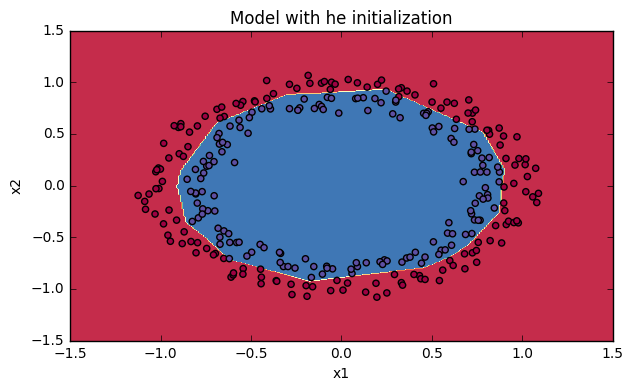

In [26]:
plt.title("Model with he initialization")
axes = plt.gca()
axes.set_xlim([-1.5,1.5])
axes.set_ylim([-1.5,1.5])
plot_decision_boundary(lambda x:predict_dec(parameters , x.T),train_X , train_Y)